In [105]:
import re
import os
import string
import numpy as np
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import hashing_trick

First get the files

In [2]:
file_names = os.listdir(r"C:\Users\ishay\Documents\Data Science\Coursera and practice\ML_Mastery\NLP\bylaws")
file_names

['bylaws-39500.txt',
 'bylaws-39510.txt',
 'bylaws-39520.txt',
 'bylaws-39530.txt',
 'bylaws-39540.txt']

In [3]:
digits = re.compile(r"\d[\d\.\$]*")
text_list = []
for f in file_names:
    with open(r"C:\\Users\\ishay\\Documents\\Data Science\\Coursera and practice\\ML_Mastery\\NLP\\bylaws\\" + f, encoding='utf-8') as text:
        raw_text = text.read()
    file_text = digits.sub("<NUM>", raw_text)
    text_list.append(file_text)    

# SKLearn
### CountVectorizer

**About min_df and max_df:**
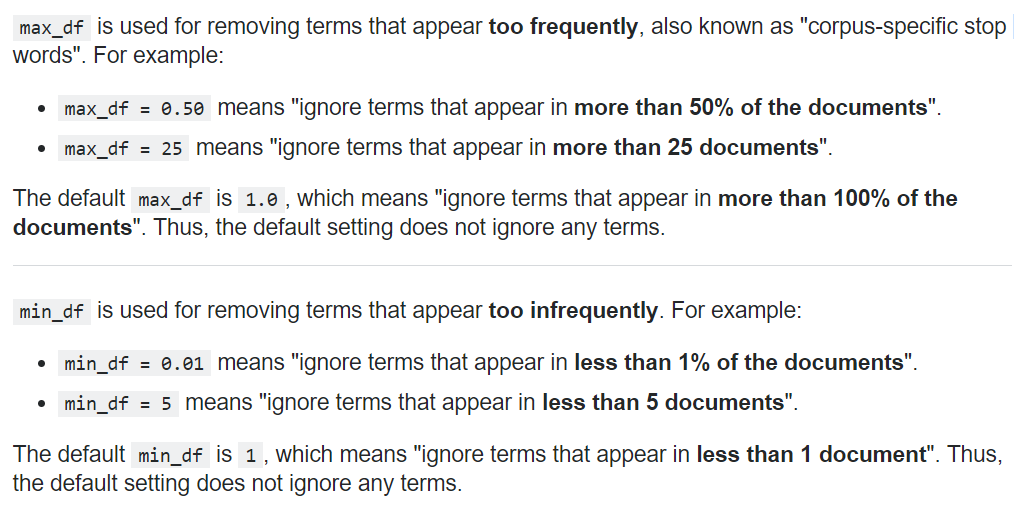

In [4]:
stemmer = SnowballStemmer('english')

In [5]:
analyzer = CountVectorizer().build_analyzer()
def my_analyzer(txt):
    return [stemmer.stem(w) for w in analyzer(txt)]
cv = CountVectorizer(min_df=2, max_df=3, analyzer=my_analyzer, stop_words='english')

In [6]:
cv.fit(text_list)

CountVectorizer(analyzer=<function my_analyzer at 0x000002001AFD4158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=3,
        max_features=None, min_df=2, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [7]:
len(cv.get_feature_names())

296

In [8]:
cv.get_feature_names()[:10]

['accru',
 'acquir',
 'acquisit',
 'action',
 'activ',
 'addit',
 'address',
 'adjust',
 'advanc',
 'affect']

In [9]:
# Vocabulary gives me the BOW
print(cv.vocabulary_)

{'inc': 121, 'exist': 95, 'revis': 223, 'herebi': 117, 'these': 266, 'below': 27, 'were': 284, 'written': 293, 'consent': 51, 'meet': 145, 'held': 115, 'manner': 142, 'prescrib': 189, 'group': 113, 'allow': 15, 'repres': 219, 'against': 12, 'cast': 34, 'sole': 236, 'suffici': 250, 'thereof': 264, 'period': 181, 'continu': 58, 'perpetu': 183, 'activ': 4, 'organ': 165, 'par': 170, 'valu': 278, 'per': 179, 'consist': 54, 'prefer': 188, 'stockhold': 242, 'certif': 36, 'seri': 230, 'affect': 9, 'either': 83, 'togeth': 269, 'full': 107, 'particip': 173, 'option': 164, 'qualif': 203, 'restrict': 220, 'expressli': 97, 'vest': 281, 'hereaft': 116, 'constitut': 55, 'distinct': 75, 'dividend': 77, 'rate': 205, 'condit': 48, 'payabl': 176, 'whether': 287, 'so': 235, 'prioriti': 195, 'payment': 177, 'addit': 5, 'convers': 60, 'privileg': 196, 'adjust': 7, 'event': 88, 'redeem': 208, 'redempt': 209, 'after': 11, 'vari': 279, 'differ': 70, 'sink': 234, 'purchas': 202, 'liquid': 137, 'distribut': 76, 

In [10]:
file_vec = cv.transform(text_list)

In [11]:
type(file_vec)

scipy.sparse.csr.csr_matrix

In [12]:
file_vec.shape

(5, 296)

So, the transformed object is a matrix with 5 rows (for each of the files) and 296 columns as the lenth of the BOW

### TfidfVectorizer

Term Frequency - Inverse Document Frequency

TF – How many times the term appears is the specific document (we want high TF)

IDF – How many times the terms appears in all of the documents (we want low IDF)


In [13]:
tfidf = TfidfVectorizer(min_df=2, max_df=3, analyzer=my_analyzer, stop_words='english')

In [14]:
tfidf.fit(text_list)

TfidfVectorizer(analyzer=<function my_analyzer at 0x000002001AFD4158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=3,
        max_features=None, min_df=2, ngram_range=(1, 1), norm='l2',
        preprocessor=None, smooth_idf=True, stop_words='english',
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [15]:
tfidf.get_feature_names()[:10]

['accru',
 'acquir',
 'acquisit',
 'action',
 'activ',
 'addit',
 'address',
 'adjust',
 'advanc',
 'affect']

Same as the Countvectorizer

In [16]:
len(tfidf.get_feature_names())

296

In [17]:
# idf_ are all the denominators for each of the 296 words
tfidf.idf_

array([ 1.69314718,  1.69314718,  1.69314718,  1.40546511,  1.69314718,
        1.69314718,  1.69314718,  1.69314718,  1.69314718,  1.69314718,
        1.40546511,  1.40546511,  1.69314718,  1.69314718,  1.69314718,
        1.69314718,  1.69314718,  1.69314718,  1.40546511,  1.69314718,
        1.69314718,  1.40546511,  1.69314718,  1.40546511,  1.69314718,
        1.69314718,  1.69314718,  1.69314718,  1.69314718,  1.69314718,
        1.69314718,  1.69314718,  1.69314718,  1.40546511,  1.69314718,
        1.40546511,  1.40546511,  1.69314718,  1.69314718,  1.69314718,
        1.69314718,  1.69314718,  1.69314718,  1.40546511,  1.69314718,
        1.69314718,  1.69314718,  1.69314718,  1.40546511,  1.69314718,
        1.69314718,  1.69314718,  1.69314718,  1.69314718,  1.40546511,
        1.40546511,  1.69314718,  1.40546511,  1.69314718,  1.69314718,
        1.40546511,  1.40546511,  1.69314718,  1.40546511,  1.40546511,
        1.40546511,  1.69314718,  1.69314718,  1.69314718,  1.69

In [18]:
file_vec_tfidf = tfidf.transform(text_list)

In [19]:
file_vec_tfidf.shape

(5, 296)

In [20]:
print(file_vec_tfidf[0, :20])

  (0, 18)	0.0276636391719
  (0, 15)	0.0333260586817
  (0, 13)	0.0333260586817
  (0, 12)	0.0333260586817
  (0, 11)	0.0553272783438
  (0, 10)	0.0276636391719
  (0, 9)	0.0333260586817
  (0, 7)	0.0333260586817
  (0, 5)	0.0666521173634
  (0, 4)	0.0333260586817
  (0, 3)	0.0829909175157
  (0, 0)	0.0333260586817


In the first document (0 on rows), there are 12 words out of the 296. Their location in the vectoer is the second figure in each tuple

### HashingVectorizer

A clever work around is to use a one way hash of words to convert them to integers. The clever part is that no vocabulary is required and you can choose an arbitrary-long fixed length vector. A downside is that the hash is a one-way function so there is no way to convert the encoding back to a word (which may not matter for many supervised learning tasks).

In [21]:
hv = HashingVectorizer(n_features=30)

In [22]:
hash_vec = hv.transform(text_list)

In [23]:
hash_vec.shape

(5, 30)

Now I have for each document a vector of 30 that represents the whole document

In [24]:
hash_vec

<5x30 sparse matrix of type '<class 'numpy.float64'>'
	with 149 stored elements in Compressed Sparse Row format>

In [25]:
print(hash_vec[0,:])

  (0, 0)	-0.252696876015
  (0, 1)	0.260982019491
  (0, 2)	0.0331405739036
  (0, 3)	-0.0704237195452
  (0, 4)	-0.0082851434759
  (0, 5)	-0.240269160801
  (0, 6)	0.671096621548
  (0, 7)	0.0082851434759
  (0, 8)	0.0207128586898
  (0, 9)	0.0372831456416
  (0, 10)	-0.0331405739036
  (0, 11)	0.0662811478072
  (0, 12)	-0.0289980021657
  (0, 13)	0.0704237195452
  (0, 14)	-0.0124277152139
  (0, 15)	-0.00414257173795
  (0, 16)	0.0331405739036
  (0, 17)	0.111849436925
  (0, 18)	-0.48468089334
  (0, 19)	0.082851434759
  (0, 20)	0.0
  (0, 21)	-0.0621385760693
  (0, 22)	-0.082851434759
  (0, 23)	0.0497108608554
  (0, 24)	-0.0207128586898
  (0, 25)	0.231984017325
  (0, 26)	-0.0538534325934
  (0, 27)	0.0704237195452
  (0, 28)	-0.0538534325934
  (0, 29)	-0.082851434759


The above is the hash vector of the first document (0)

# BOW with Keras
**Tokenizer**

In [33]:
keras_tok = Tokenizer()

In [34]:
keras_tok

The input must be a list of ducument (list of strings). If it takes a single string, the output will be letters and not words

In [35]:
keras_tok.fit_on_texts(text_list)

After the fit we can examine the following:

In [36]:
# How many occurances from each word in total
keras_tok.word_counts

OrderedDict([('exhibit', 6),
             ('num', 293),
             ('nightingale', 4),
             ('inc', 8),
             ('form', 6),
             ('k', 1),
             ('file', 2),
             ('no', 11),
             ('d', 10),
             ('amended', 30),
             ('and', 355),
             ('restated', 14),
             ('of', 1188),
             ('the', 1297),
             ('“corporation”', 1),
             ('was', 21),
             ('formed', 3),
             ('is', 102),
             ('existing', 2),
             ('under', 23),
             ('utah', 3),
             ('revised', 3),
             ('business', 48),
             ('corporation', 137),
             ('act', 21),
             ('“urbca”', 1),
             ('hereby', 5),
             ('adopts', 1),
             ('these', 19),
             ('articles', 36),
             ('incorporation', 35),
             ('which', 85),
             ('restate', 1),
             ('integrate', 1),
             ('amend', 9),
    

The difficulty with Keras Tokenizer that it does not stem and do not provide any tool for excluding stop words. I need to do that **prior** to the Tokenizer step.

In [39]:
print(keras_tok.document_count)

5


In [38]:
# In how many documents each word appears
keras_tok.word_docs

defaultdict(int,
            {'as': 5,
             'required': 5,
             'not': 4,
             'special': 4,
             'duration': 1,
             'holder': 3,
             'issue': 4,
             'commerce': 1,
             'adopts': 1,
             'providing': 3,
             'suit': 2,
             'belief': 1,
             'amendments': 2,
             'been': 5,
             'and': 5,
             'whether': 3,
             'thereunto': 1,
             'by': 5,
             'executed': 2,
             'number': 5,
             'set': 4,
             'adjustment': 1,
             'i': 4,
             'approval': 3,
             'inconsistent': 3,
             'other': 4,
             'except': 4,
             'group': 2,
             'resolutions': 2,
             'having': 3,
             'separately': 1,
             'permitted': 4,
             'capital': 4,
             'certificate': 3,
             'appeal': 1,
             'effect': 4,
             'without': 4,

In [40]:
print(keras_tok.word_index)

{'the': 1, 'of': 2, 'or': 3, 'and': 4, 'to': 5, 'num': 6, 'any': 7, 'a': 8, 'be': 9, 'by': 10, 'shall': 11, 'such': 12, 'in': 13, 'stock': 14, 'as': 15, 'board': 16, 'corporation': 17, 'shares': 18, 'directors': 19, 'is': 20, 'may': 21, 'for': 22, 'other': 23, 'at': 24, 'voting': 25, 'article': 26, 'which': 27, 'shareholder': 28, 'meeting': 29, 'time': 30, 'on': 31, 'company': 32, 'not': 33, 'with': 34, 'this': 35, 'section': 36, 'series': 37, 'vote': 38, 'all': 39, 'interested': 40, 'class': 41, 'that': 42, 'have': 43, 'if': 44, 'business': 45, 'shareholders': 46, 'share': 47, 'person': 48, 'an': 49, 'chairman': 50, 'number': 51, 'than': 52, 'president': 53, 'from': 54, 'rights': 55, 'outstanding': 56, 'capital': 57, 'articles': 58, 'director': 59, 'incorporation': 60, 'each': 61, 'entitled': 62, 'duties': 63, 'holders': 64, 'date': 65, 'notice': 66, 'preferred': 67, 'provided': 68, 'majority': 69, 'per': 70, 'amended': 71, 'assistant': 72, 'including': 73, 'are': 74, 'law': 75, 'valu

In [41]:
# Making sure the following have the same length
print(len(keras_tok.word_counts))
print(len(keras_tok.word_docs))
print(len(keras_tok.word_index))

1302
1302
1302


Now supposed I recieved a new text, and I want to encode it according to the tokenizer

In [111]:
new_text = "The thing with good movies set in historical or prehistorical settings is that often we have less than we'd like to go on and must rely on artistic interpretations for dramatic or practical effect. Bad movies like this just don't care. I have little regard for productions that insult a well informed audience by carelessly throwing in obvious impossibilities, hoping that no one would notice. I go to a theater or sit down at home to be immersed for a hour or two in make believe that ought at least to be *believable*. So when I see the heroes interacting with animals or beasts that have no business being where they are through plot arcs that flaunt mainstream scholarship on the subject, it takes me out of the fantasy and makes me wish I'd chosen something else. This movie is so inaccurate with regards to ice age natural history and what we know about early humans through archaeology, a documentary to explain all of them out would take as long as the running time of this one. After the disappointment of 2008's 10,000 BC, my expectations were low going in. yup. Not much better."

Step 1 - Cleaning

In [112]:
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # turn to lower
    tokens = [word.lower() for word in tokens]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

In [113]:
tokenized = clean_doc(new_text)
tokenized[:5]

['thing', 'good', 'movies', 'set', 'historical']

Step 2 - Encoding

In [114]:
encoded = [keras_tok.word_index[word] for word in tokenized if word in keras_tok.word_index]
encoded[:5]

[403, 146, 178, 1071, 336]

Another way for encoding

In [115]:
sequenced = keras_tok.texts_to_sequences([tokenized]) # I must use the squared brackets because normally the text_to_sequences
# refers to several documents. If I use only one document, I need to use the brackets to indicate that it is one document in a
# list
sequenced[0][:5]

[403, 146, 178, 1071, 336]

Step 3 - Padding

In [121]:
padded = sequence.pad_sequences(sequenced, maxlen=400)
padded[0] # Need to use only the first element ([0])

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

**text_to_word_sequence**

By default, this function automatically does 3 things:
- Splits words by space (split=” “).
- Filters out punctuation (filters=’!”#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n’).
- Converts text to lowercase (lower=True).

You can change any of these defaults by passing arguments to the function.

In [ ]:
# Cheking the words of the first document
text_to_word_sequence(text_list[0])[:10]

In [ ]:
type(text_to_word_sequence(text_list[0]))

It provides just a simple list

**one_hot**

Keras provides the one_hot() function that you can use to tokenize and integer encode a text document in one step. The name suggests that it will create a one-hot encoding of the document, **which is not the case**.

Instead, the function is a wrapper for the hashing_trick() function described in the next section. The function returns an integer encoded version of the document. The use of a hash function means that there may be collisions and not all words will be assigned unique integer values.

In [ ]:
# First I get the number of words from the text_to_word_sequence
n_words = set(text_to_word_sequence(text_list[0]))
vocab_size = len(n_words)
print(vocab_size)

The secong argument in the one_hot is the size of vocabulary to be used. However, since the one_hot includes hashing (meaning that the number of words is smaller than the real one, normally this argument needs to be multiplied by some scaler.

In [ ]:
# integer encode the document
result = one_hot(text_list[0], vocab_size) # or round(vocab_size*1.3) instead of vocab_size
print(result[:50])

In [ ]:
len(result)

**hashing_trick**

This is like the one_hot, but can use different types of hashing methods

In [ ]:
result_hash_simple = hashing_trick(text_list[0], vocab_size)
print(result_hash_simple[:50])

If I do not specify the hashing function, I get the same results of the one_hot

In [ ]:
result_hash_md5 = hashing_trick(text_list[0], vocab_size, hash_function='md5')
print(result_hash_md5[:50])

Two or more words may be assigned to the same index, due to possible collisions by the hashing function. The probability of a collision is in relation to the dimension of the hashing space and the number of distinct objects.